In [1]:
import pynq
from pynq import Overlay
from pynq import allocate
import numpy as np

In [2]:
ov = Overlay('base.bit')

In [3]:
test_ov = Overlay('/home/xilinx/Sankalp_Rohan_TinyVTA/dma_ps/design_1.bit')

In [4]:
activ_ip = test_ov.acti_proc_0

In [5]:
# // 0x00 : Control signals
# //        bit 0  - ap_start (Read/Write/COH)
# //        bit 1  - ap_done (Read/COR)
# //        bit 2  - ap_idle (Read)
# //        bit 3  - ap_ready (Read/COR)
# //        bit 7  - auto_restart (Read/Write)
# //        bit 9  - interrupt (Read)
# //        others - reserved
# // 0x04 : Global Interrupt Enable Register
# //        bit 0  - Global Interrupt Enable (Read/Write)
# //        others - reserved
# // 0x08 : IP Interrupt Enable Register (Read/Write)
# //        bit 0 - enable ap_done interrupt (Read/Write)
# //        bit 1 - enable ap_ready interrupt (Read/Write)
# //        others - reserved
# // 0x0c : IP Interrupt Status Register (Read/TOW)
# //        bit 0 - ap_done (Read/TOW)
# //        bit 1 - ap_ready (Read/TOW)
# //        others - reserved
# // 0x10 : Data signal of insts
# //        bit 31~0 - insts[31:0] (Read/Write)
# // 0x14 : Data signal of insts
# //        bit 31~0 - insts[63:32] (Read/Write)
# // 0x18 : reserved
# // 0x1c : Data signal of mem_offset
# //        bit 31~0 - mem_offset[31:0] (Read/Write)
# // 0x20 : Data signal of mem_offset
# //        bit 31~0 - mem_offset[63:32] (Read/Write)
# // 0x24 : reserved
# // (SC = Self Clear, COR = Clear on Read, TOW = Toggle on Write, COH = Clear on Handshake)


In [14]:
ibuf = allocate((64), np.int64)

In [15]:
mbuf = allocate((115000), np.float32)

In [40]:
memfile = np.load("/home/xilinx/Sankalp_Rohan_TinyVTA/dma_ps/mem_1.npz")
data_mem = memfile['arr_0']
memfile = np.load("/home/xilinx/Sankalp_Rohan_TinyVTA/dma_ps/inst_1.npz")
inst_mem = memfile['arr_0']

In [41]:
inst_mem.shape

(5,)

In [42]:
inst_mem = np.array([4613937818308186112, 2594090977819885568, 4613955410561340416, 2594095375933505536, 4613959808674961408], dtype=np.int64)

In [43]:
data_mem = data_mem.flatten()

In [44]:
data_mem.shape

(114688,)

In [45]:
data_mem.dtype

dtype('float32')

In [46]:
inst_mem.dtype

dtype('int64')

In [47]:
mbuf[:data_mem.shape[0]] = data_mem
mbuf[data_mem.shape[0]:] = 0

In [48]:
ibuf[:inst_mem.shape[0]] = inst_mem
ibuf[data_mem.shape[0]:] = 0

In [49]:
ibuf

PynqBuffer([4613937818308186112, 2594090977819885568, 4613955410561340416,
            2594095375933505536, 4613959808674961408,                   0,
                              0,                   0,                   0,
                              0,                   0,                   0,
                              0,                   0,                   0,
                              0,                   0,                   0,
                              0,                   0,                   0,
                              0,                   0,                   0,
                              0,                   0,                   0,
                              0,                   0,                   0,
                              0,                   0,                   0,
                              0,                   0,                   0,
                              0,                   0,                   0,
                         

In [50]:
activ_ip.write(0x10, ibuf.physical_address)

In [51]:
activ_ip.write(0x1c, mbuf.physical_address)

In [52]:
activ_ip.write(0x00, 1)

In [54]:
bin(activ_ip.read(0x00))

'0b100'

In [31]:
np.set_printoptions(threshold=np.inf)
sh = mbuf[98304: 98304 + 128*128]

In [55]:
sh.reshape(128,128)[:, :10]

PynqBuffer([[-10.038211  , -12.153413  , -19.580471  , -19.16065   ,
             -13.004403  , -19.284672  , -10.2366    , -17.25605   ,
              14.638393  ,  -3.5881793 ],
            [ 19.963396  , -27.896519  ,  -8.5506525 , -16.699514  ,
             -19.313019  , -29.365313  , -14.121007  , -20.079266  ,
             -10.59692   ,  -9.77647   ],
            [-14.198601  ,  -7.708479  , -14.651089  ,   0.09239799,
             -11.16078   , -11.594901  , -14.885378  ,  11.363121  ,
              -5.3306775 ,  -3.7342765 ],
            [-19.547941  , -19.531332  , -54.5022    , -22.393024  ,
              63.967022  , -38.553978  , -25.557905  , -36.382     ,
             -32.074318  , -55.019936  ],
            [-17.665865  , -14.544517  , -40.448727  , -18.305109  ,
              38.87582   , -21.447891  , -14.284514  , -17.221468  ,
             -22.537699  , -36.13445   ],
            [-17.87334   , -18.605505  , -20.839767  ,   1.3890011 ,
             -25.432688  ,  19.

In [61]:
hw_y = np.array(np.argmax(sh.reshape(128,128)[:, :10], axis=1))

In [62]:
hw_y

array([8, 0, 7, 4, 4, 5, 5, 0, 3, 0, 6, 1, 8, 9, 2, 4, 0, 4, 7, 1, 2, 3,
       7, 1, 8, 2, 8, 9, 7, 8, 4, 9, 5, 7, 0, 4, 5, 1, 9, 2, 2, 1, 0, 4,
       0, 4, 7, 7, 5, 7, 8, 3, 7, 1, 3, 8, 7, 8, 6, 8, 6, 6, 7, 2, 4, 0,
       3, 1, 5, 3, 5, 9, 6, 5, 0, 6, 9, 2, 7, 4, 8, 6, 6, 0, 3, 6, 1, 9,
       8, 5, 8, 0, 5, 3, 1, 3, 9, 3, 0, 1, 2, 7, 7, 2, 6, 7, 9, 5, 3, 0,
       7, 8, 9, 2, 9, 6, 7, 7, 6, 8, 9, 2, 4, 5, 4, 5, 4, 3])

In [63]:
import matplotlib.pyplot as plt

In [64]:
mnist = np.load('/home/xilinx/Sankalp_Rohan_TinyVTA/dma_ps/inp.npz')
x = mnist['x']; sw_y = mnist['y']

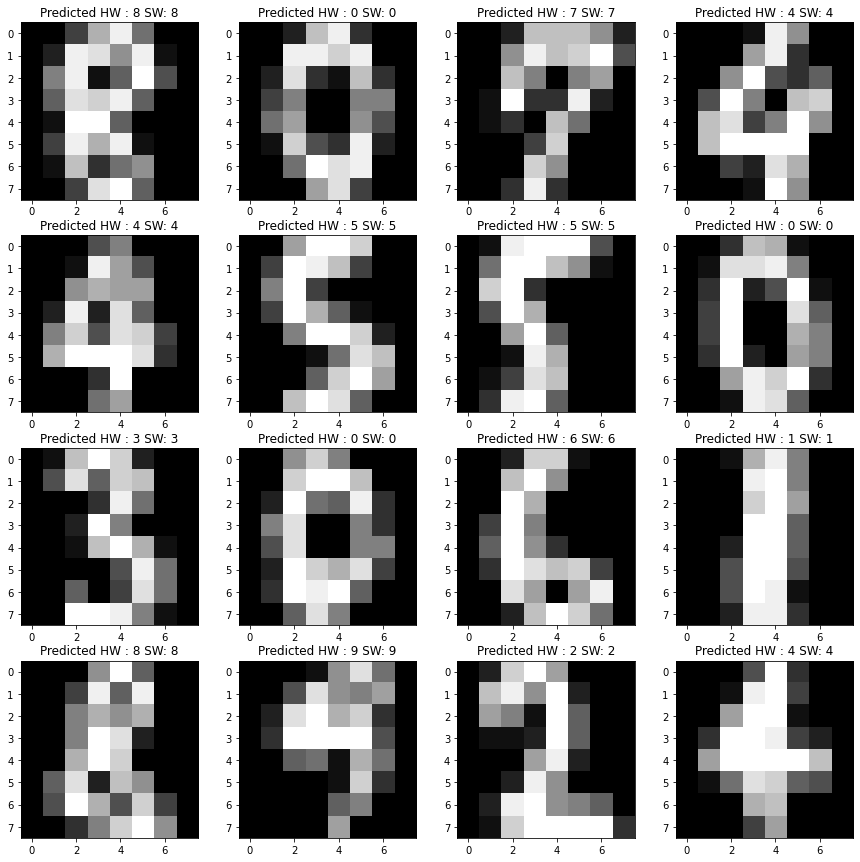

In [72]:
fig, ax = plt.subplots(4, 4, figsize=(15, 15))
k = 4
for i in range(k*k):
    ax[i//k][i%k].set_title(f"Predicted HW : {hw_y[i]} SW: {sw_y[i]}")
    ax[i//k][i%k].imshow(x[i].reshape(8,8), cmap='gray')
plt.show()
